# A case study on Time Series
You are a Data scientist at a stock brokerage company. You have been given the charge to analyse the Netflix's stock and make predictions about it. 
You need to analyse all the stock values, the data provided is of 5 years worth of stock values from 2018-2022.

Your job is to analyse and make models to predict this stock. Try as many models as possible!

**Date:** Date at which a particular value of stock was recorded.

**Open::** The value at which stock was opened at that day.

**High::** Highest value of the stock during the day.

**Low::** Lowest value of the stock during the day.

**Close::** The day end's value of the stock, the closing value

**Adj Close::** The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions

**Volume::** Volume in the stock market means the total number of shares traded in a specified time frame. This would include every share that is bought and sold during the time period in review

In [2]:
#Importing data related libraries 
import pandas as pd 
import numpy as np 

#import plotting related libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.gridspec import GridSpec 

#import modeling and statistical libraries 
import statsmodels.api as sm 
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller 

In [3]:
df = pd.read_csv('NFLX.csv.xls')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [6]:
df.shape

(1009, 7)

In [8]:
#Exploratory Data Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [9]:
df.isna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1004,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,False
1006,False,False,False,False,False,False,False
1007,False,False,False,False,False,False,False


In [10]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df['Datatime'] = pd.to_datetime(df['Date'])
df = df.set_index('Datatime')

(array([17532., 17713., 17897., 18078., 18262., 18444., 18628., 18809.,
        18993.]),
 [Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01'),
  Text(18078.0, 0, '2019-07'),
  Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01')])

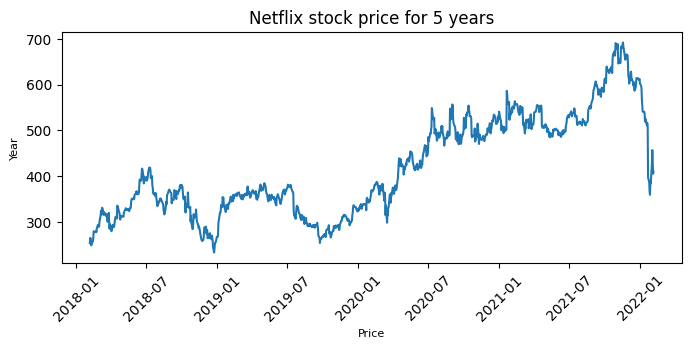

In [15]:
#plotting using matplotlib 
plt.figure(figsize = (8,3))
plt.plot(df['Adj Close'])
plt.title('Netflix stock price for 5 years')
plt.xlabel('Price', fontsize = 8)
plt.ylabel('Year', fontsize = 8)
plt.xticks(rotation = 45)

array([<Axes: xlabel='Datatime'>, <Axes: xlabel='Datatime'>,
       <Axes: xlabel='Datatime'>, <Axes: xlabel='Datatime'>,
       <Axes: xlabel='Datatime'>, <Axes: xlabel='Datatime'>], dtype=object)

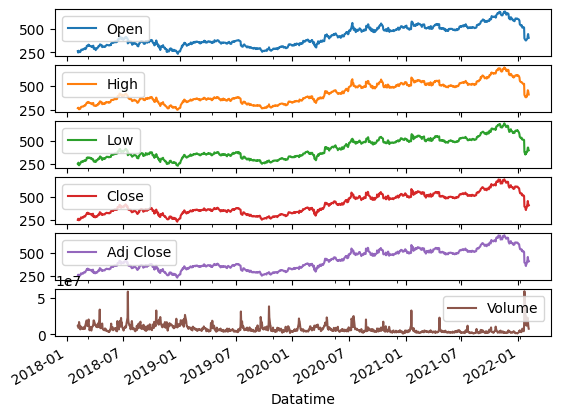

In [16]:
df.plot(subplots=True)

In [17]:
features, target = df.drop(columns=['Close', 'Date', 'Volume'], axis = 1), df['Close']

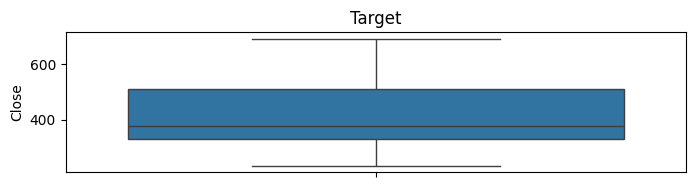

In [19]:
#We will create a plot grid to analyse these columns 
nrows, ncols = 3,2 
fig = plt.figure(figsize = (8,4))
spec = GridSpec(ncols = ncols, nrows = nrows, top = 1.3)
my_id = 0 
for i in range(nrows): 
    for j in range(ncols):
        if i == nrows-1:
            ax = fig.add_subplot(spec[i,:])
            sns.boxplot(target)
            ax.set_title('Target')
            break
            ax = fig.add_subplot(spec[i,j])
            sns.boxplot(features.iloc[:, my_id])
            ax.set_title(features.columns[my_id])
            my_id +=1

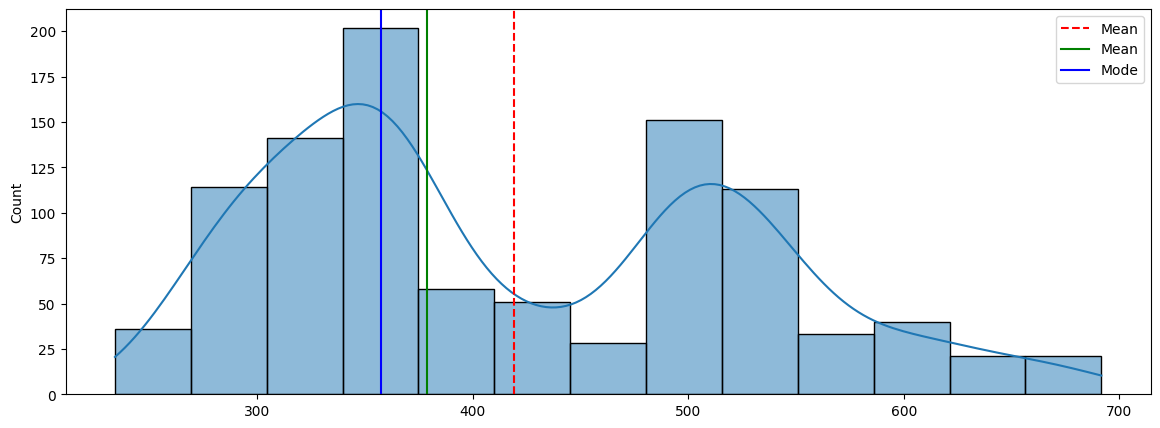

In [21]:
f, (ax1) = plt.subplots(1, 1, figsize=(14, 5))
# distribution of target values
v_dist_1 = target.values
# histogram plot
sns.histplot(v_dist_1, ax=ax1, kde=True)
# find the mean
mean=target.mean()
# find the median
median=target.median()
# find the mode
mode=target.mode().values[0]
# plot all of them together
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Mean")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")
ax1.legend()

In [22]:
#Analysing a time series is a statistical problems. It involves visualization, decomposition and running statistical tests. First lets understand the components 
# of time series which is trend, seasonalisty and noise 

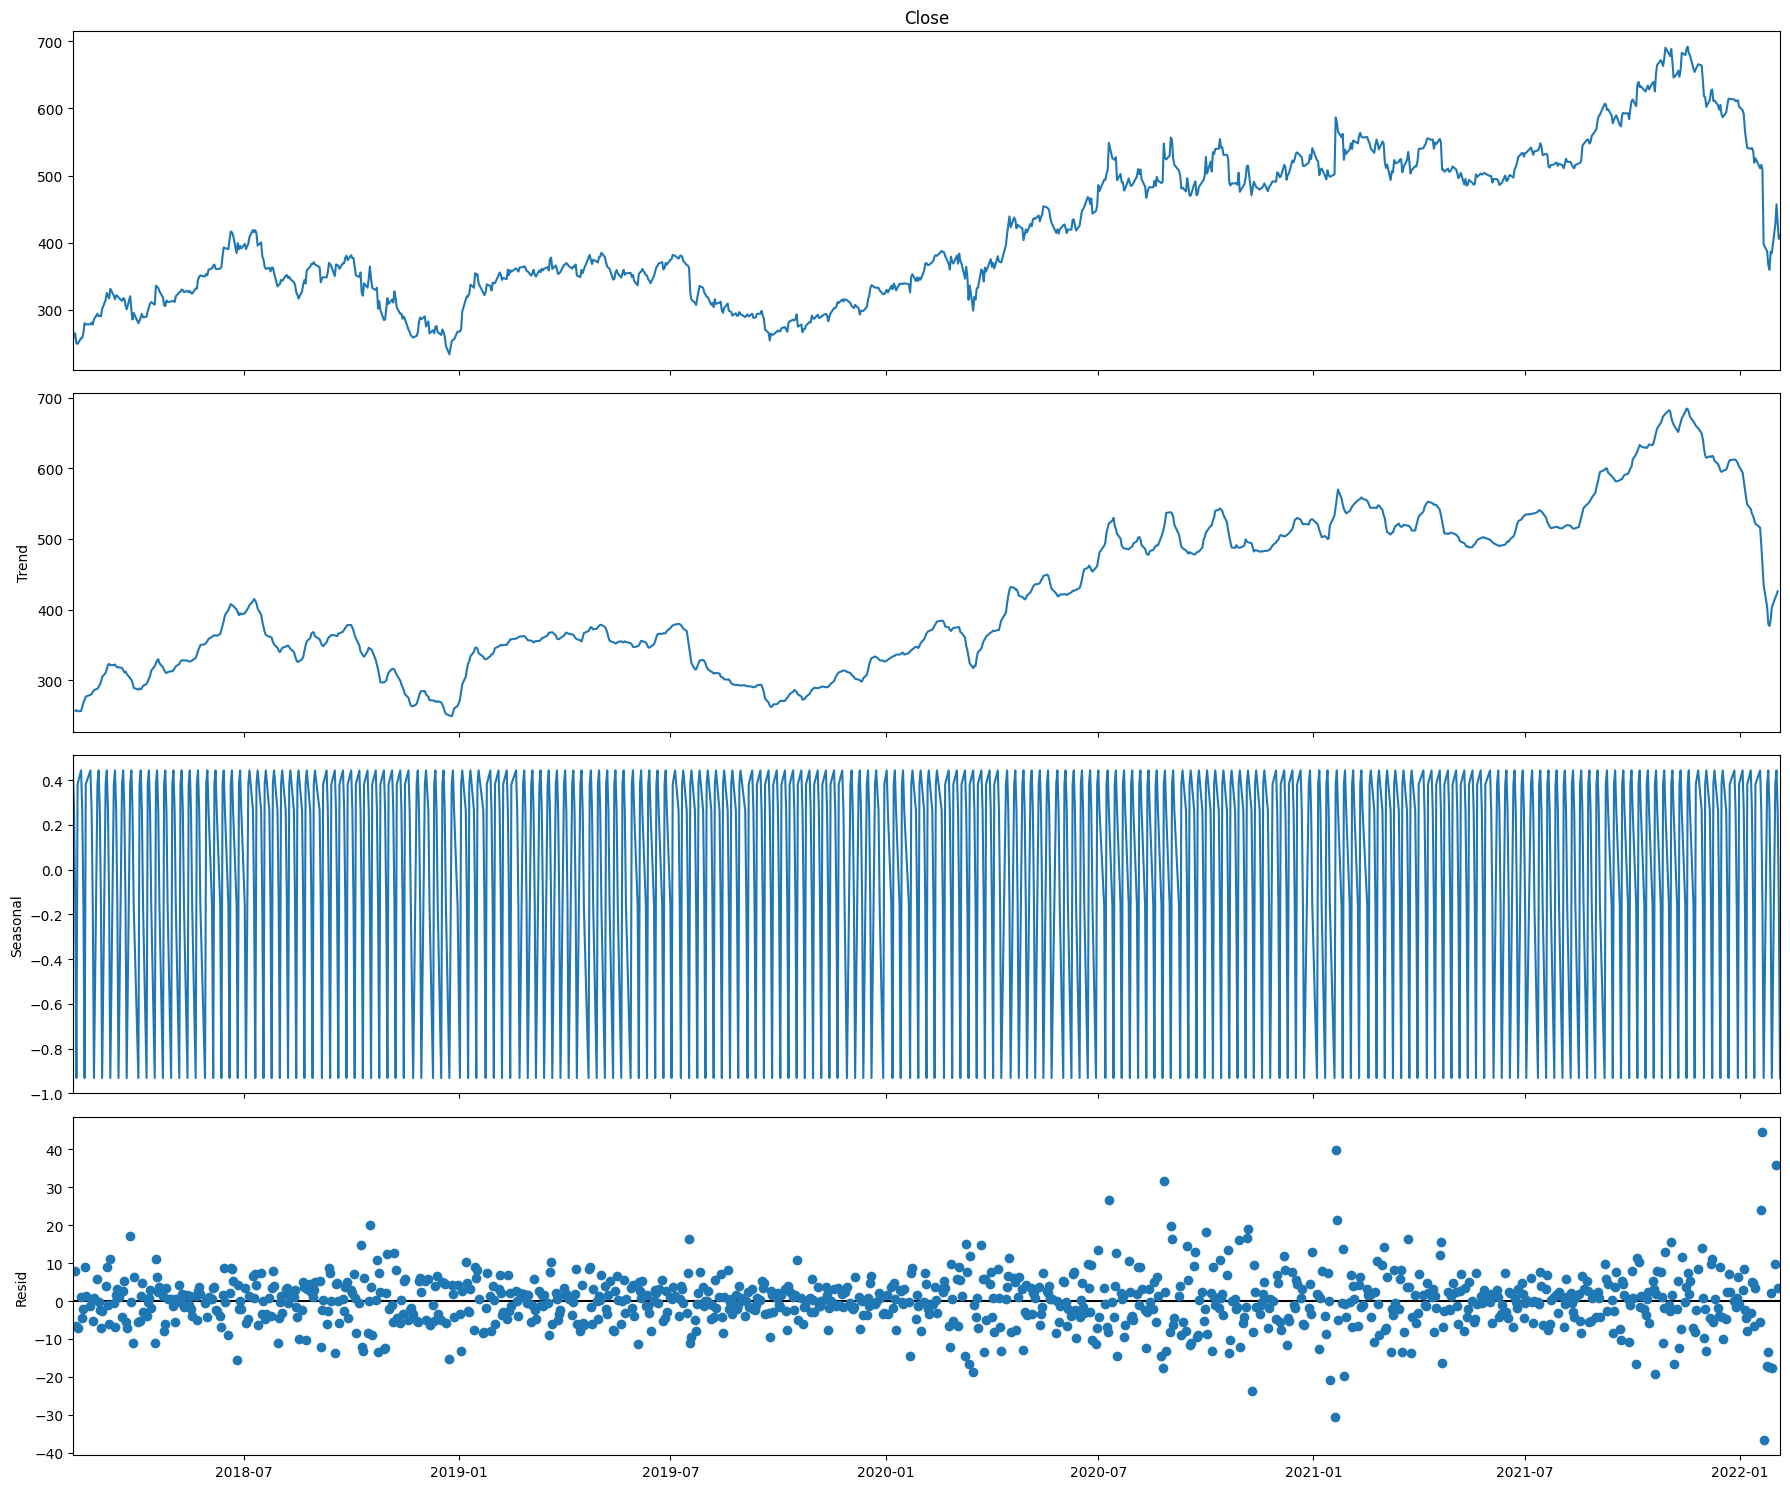

In [25]:
from pylab import rcParams 
rcParams['figure.figsize'] = 18,15
dec = sm.tsa.seasonal_decompose(df['Close'], period = 5, model = 'additive').plot()
plt.show()

In [31]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window=5).mean()
    MSTD = timeseries.rolling(window=5).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

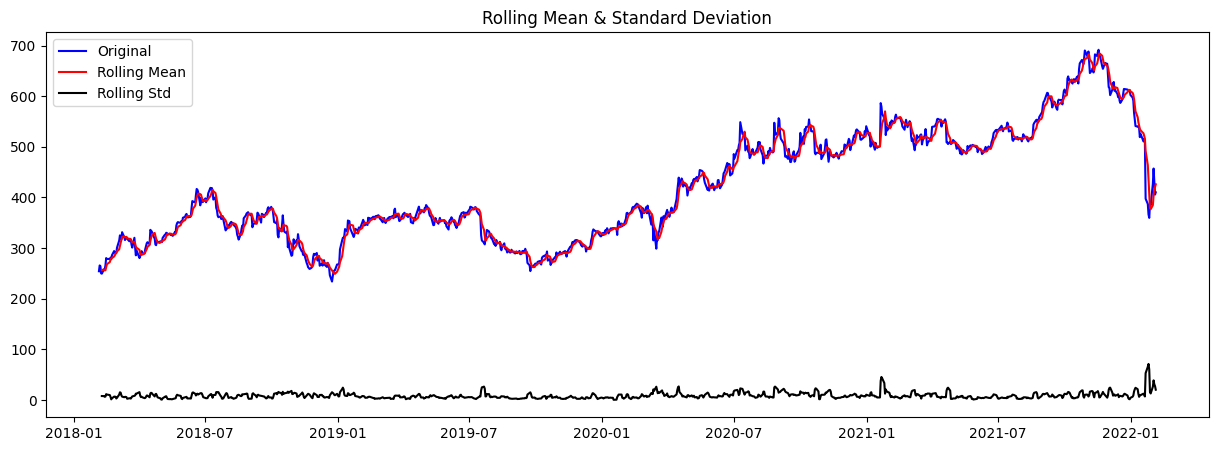

Results of Dickey-Fuller Test:
Test Statistic                   -1.812591
p-value                           0.374229
#Lags Used                        6.000000
Number of Observations Used    1002.000000
Critical Value (1%)              -3.436893
Critical Value (5%)              -2.864429
Critical Value (10%)             -2.568308
dtype: float64


In [32]:
test_stationarity(df['Close'])

In [34]:
data = df[['Date', 'Close']]
data = data.set_index('Date')

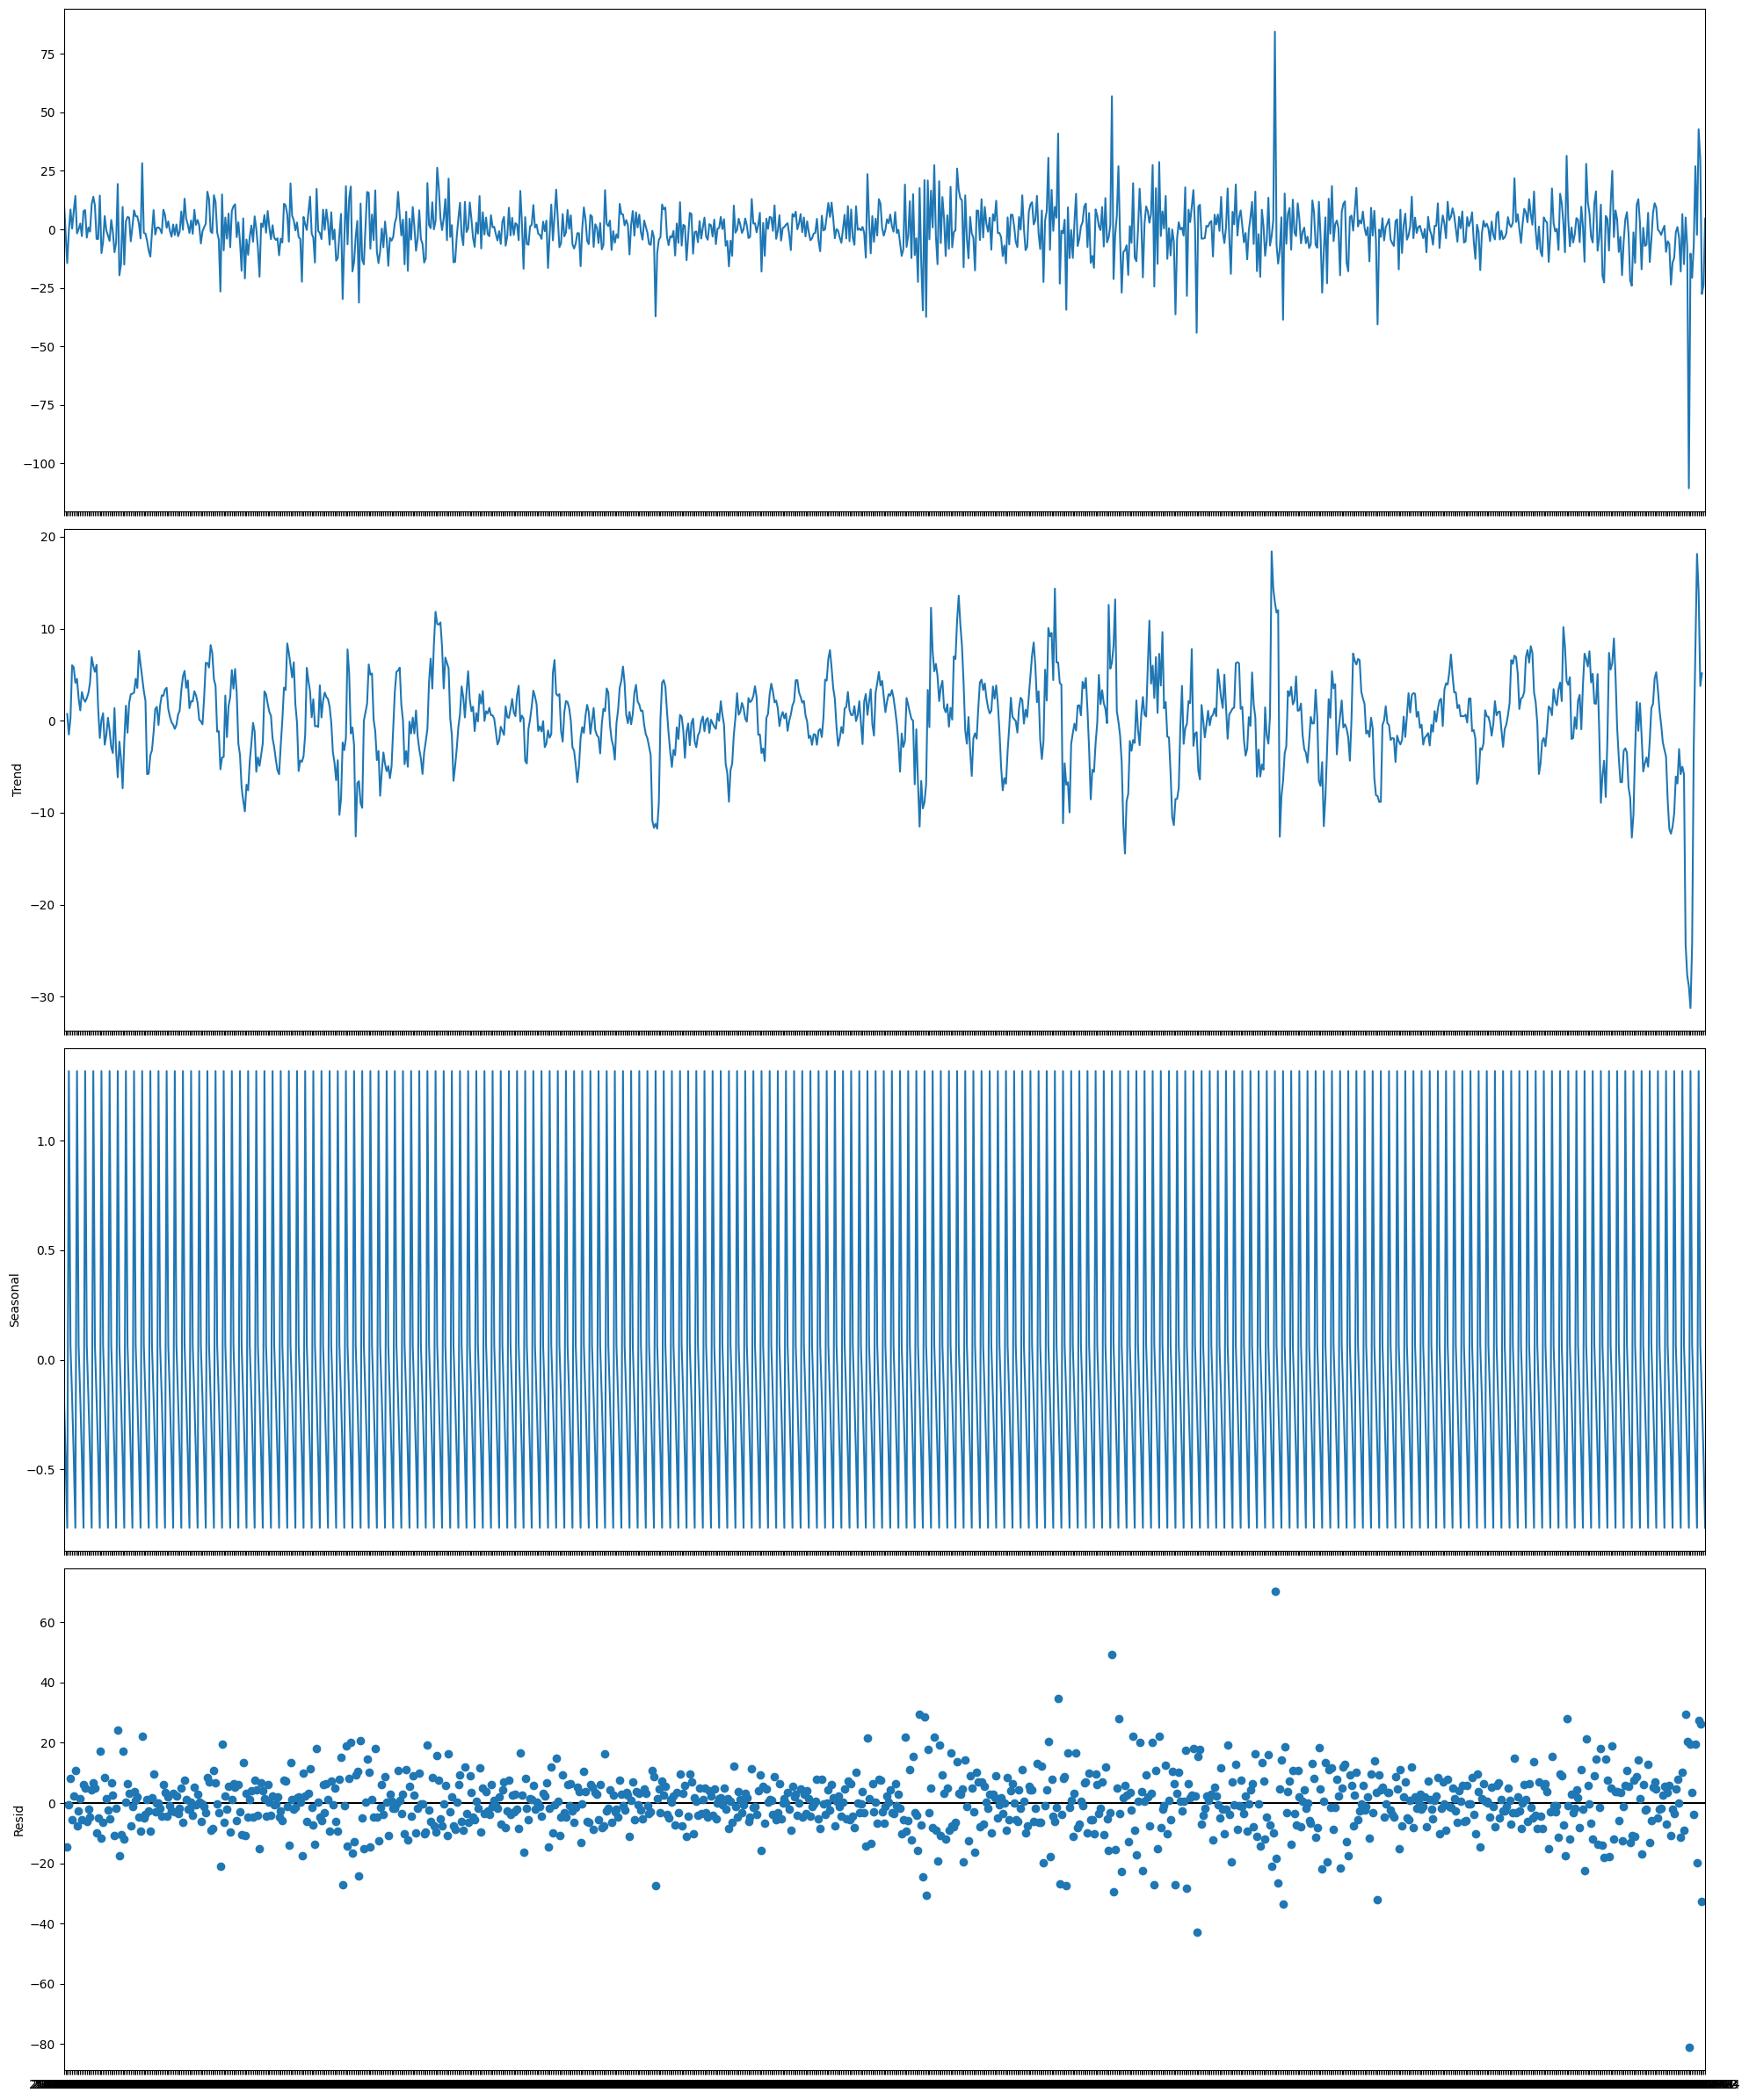

In [37]:
data_diff = data.diff()
data_diff = data_diff.dropna()
rcParams['figure.figsize'] = 20,24

# Lets now decompose and see
dec = sm.tsa.seasonal_decompose(data_diff,period = 5).plot()
plt.show()

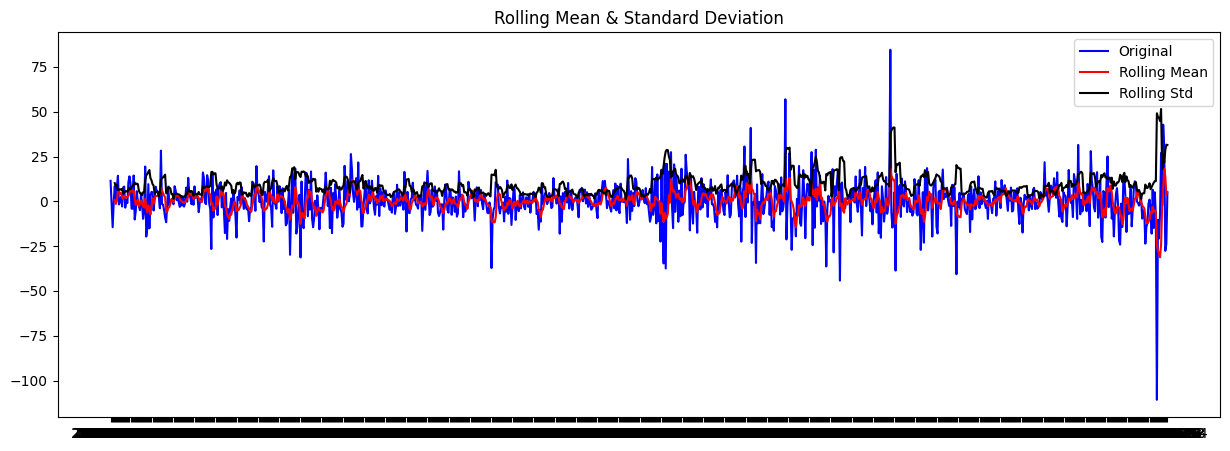

Results of Dickey-Fuller Test:
Test Statistic                -1.424228e+01
p-value                        1.530402e-26
#Lags Used                     5.000000e+00
Number of Observations Used    1.002000e+03
Critical Value (1%)           -3.436893e+00
Critical Value (5%)           -2.864429e+00
Critical Value (10%)          -2.568308e+00
dtype: float64


In [38]:
test_stationarity(data_diff)

In [39]:
def plotResults(data,forecast,label):
#     plot model's forecast vs actual values
    plt.figure(figsize=(20,5))
    plt.plot(data, label='Train')
    naive=plt.plot(forecast, label=label)
    plt.legend(loc='best')
    plt.title(label+" forecast")
    return plt

In [40]:
from sklearn.metrics import mean_squared_error

def getMetrics(data, forecast,  method):
    rmse = np.sqrt(mean_squared_error(data, forecast)).round(2)
#     mape = np.round(np.mean(np.abs(data-forecast)/data)*100,2)

    results = pd.DataFrame({'Method':[method], 'RMSE': [rmse]})
    results = results[['Method', 'RMSE']]
    return results

In [41]:
models=[]
results=[]

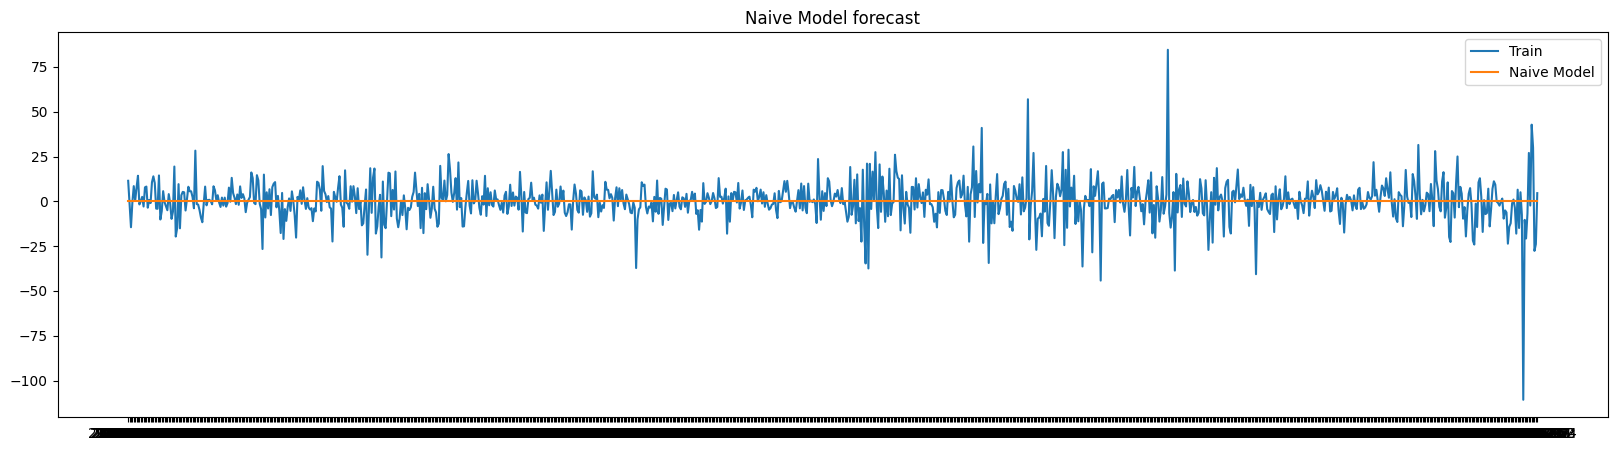

In [42]:
# naiveModelResult = data_diff.copy()
data_diff['naive_forecast'] = data_diff['Close'].mean()
# plots the model
label="Naive Model"
plotResults(data_diff['Close'],data_diff['naive_forecast'], label).show()

In [43]:
models.append("Naive Model")
final=getMetrics(data_diff['Close'],data_diff['naive_forecast'], "Naive Model")
results.append(final.RMSE.tolist()[0])
final

,Method,RMSE
0,Naive Model,11.05


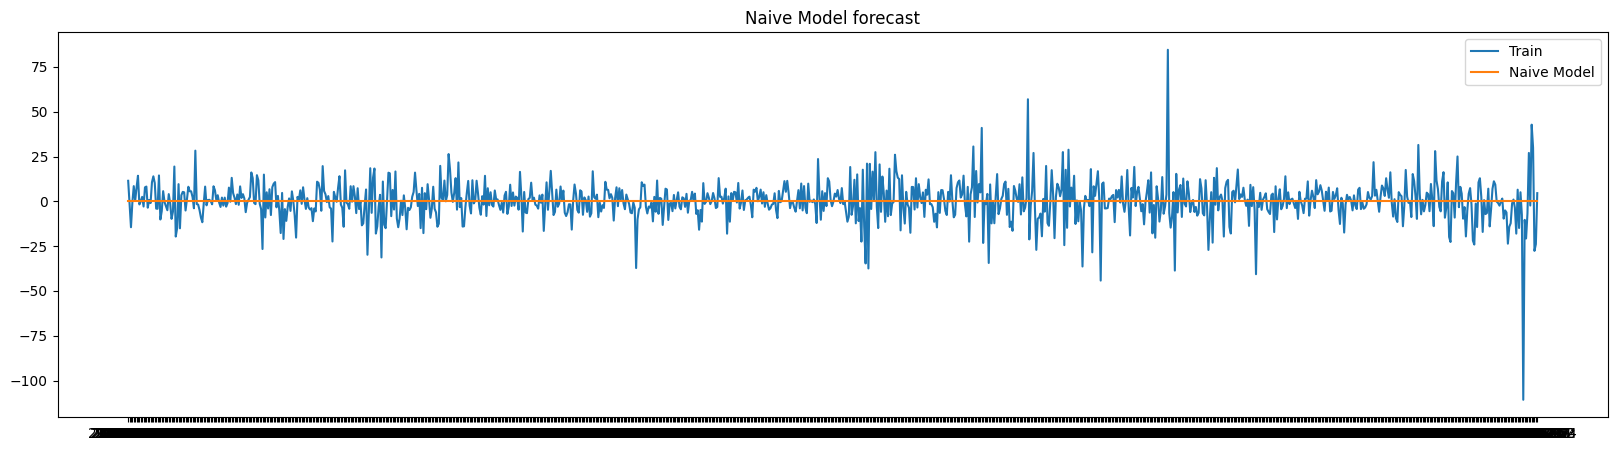

In [44]:
data_diff['maForecast'] = data_diff['Close'].mean()
# plots the model
label="Naive Model"
plotResults(data_diff['Close'],data_diff['naive_forecast'], label).show()

In [45]:
# store and print results
models.append("Moving Average")
final=getMetrics(data_diff['Close'],data_diff['maForecast'],"Moving Average")
results.append(final.RMSE.tolist()[0])
final

,Method,RMSE
0,Moving Average,11.05


In [46]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [47]:
# lets define simple exponential smoothening with different values of smoothing level alpha 
fit1 = SimpleExpSmoothing(data_diff.Close, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(data_diff.Close, initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(data_diff.Close, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

C:\Users\sripa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sripa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sripa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\sripa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency inf

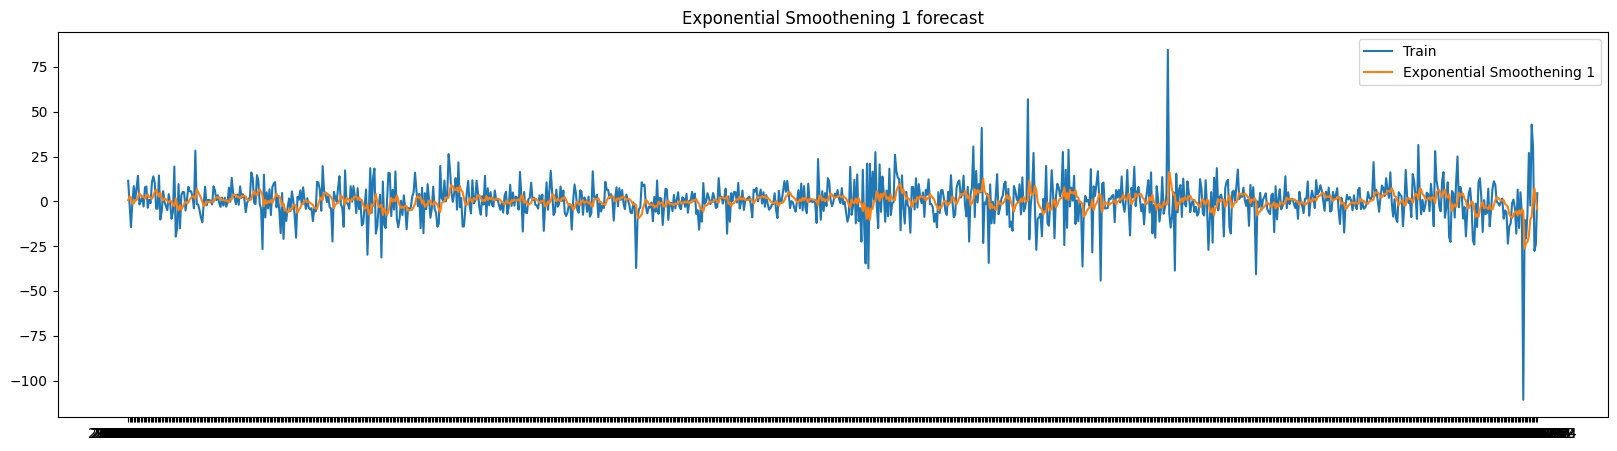

,Method,RMSE
0,Exponential Smoothening 1,11.72


In [48]:
plotResults(data_diff.Close,fit1.fittedvalues, "Exponential Smoothening 1").show()
getMetrics(data_diff.Close,fit1.fittedvalues,"Exponential Smoothening 1")

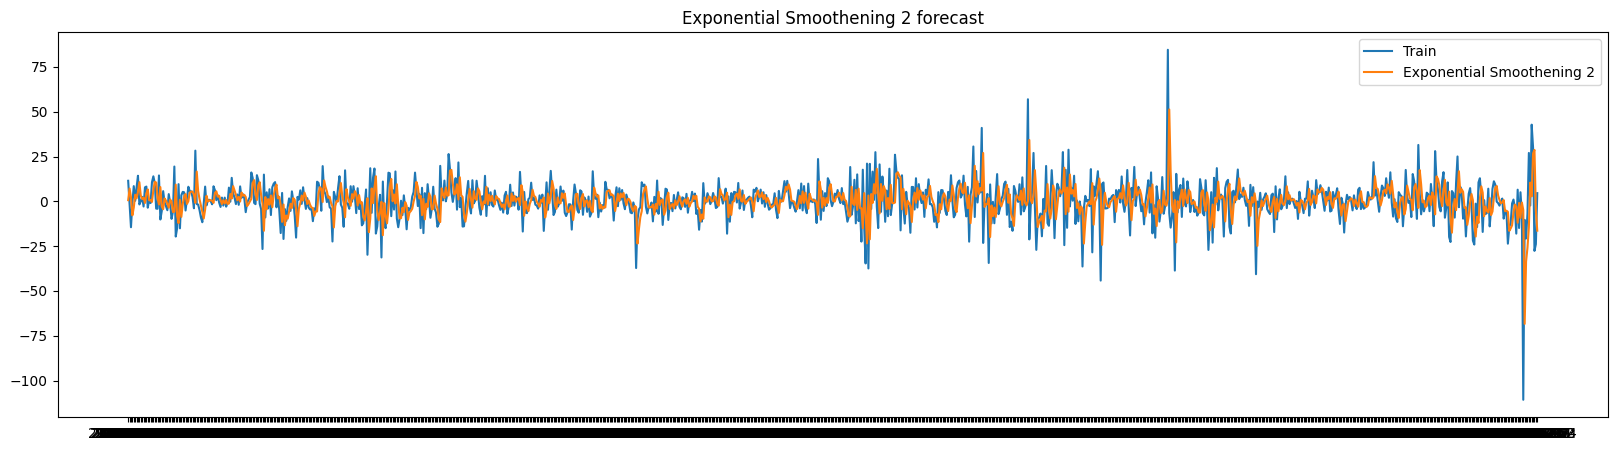

,Method,RMSE
0,Exponential Smoothening 2,13.38


In [49]:
plotResults(data_diff.Close,fit2.fittedvalues, "Exponential Smoothening 2").show()
getMetrics(data_diff.Close,fit2.fittedvalues,"Exponential Smoothening 2")

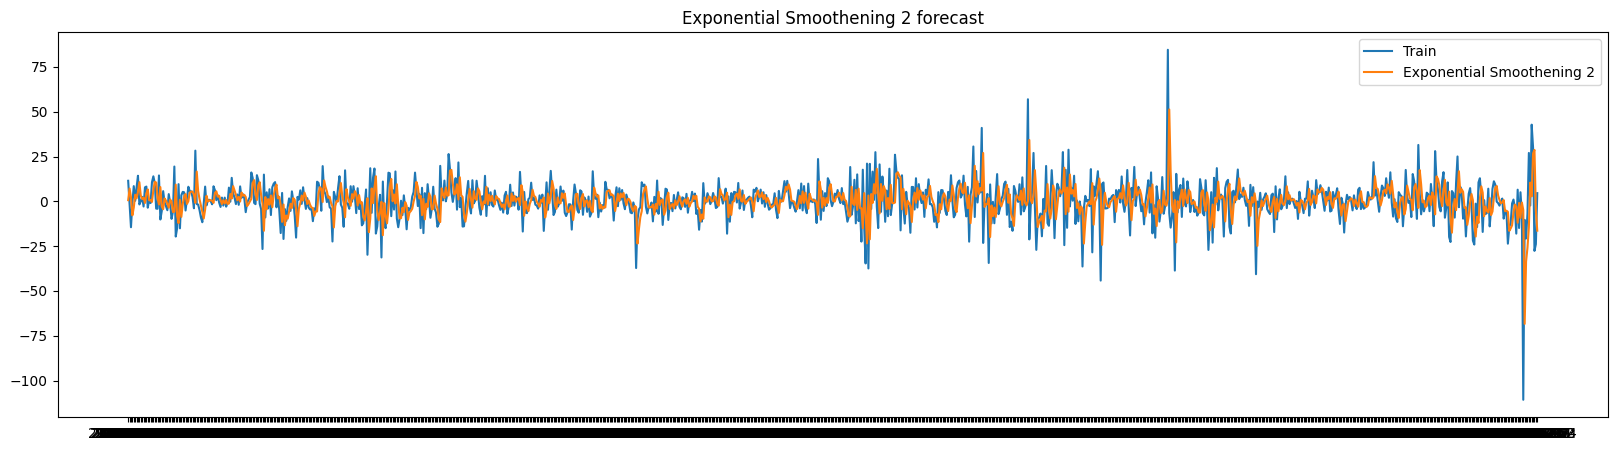

,Method,RMSE
0,Exponential Smoothening 2,13.38


In [50]:
plotResults(data_diff.Close,fit2.fittedvalues, "Exponential Smoothening 2").show()
getMetrics(data_diff.Close,fit2.fittedvalues,"Exponential Smoothening 2")

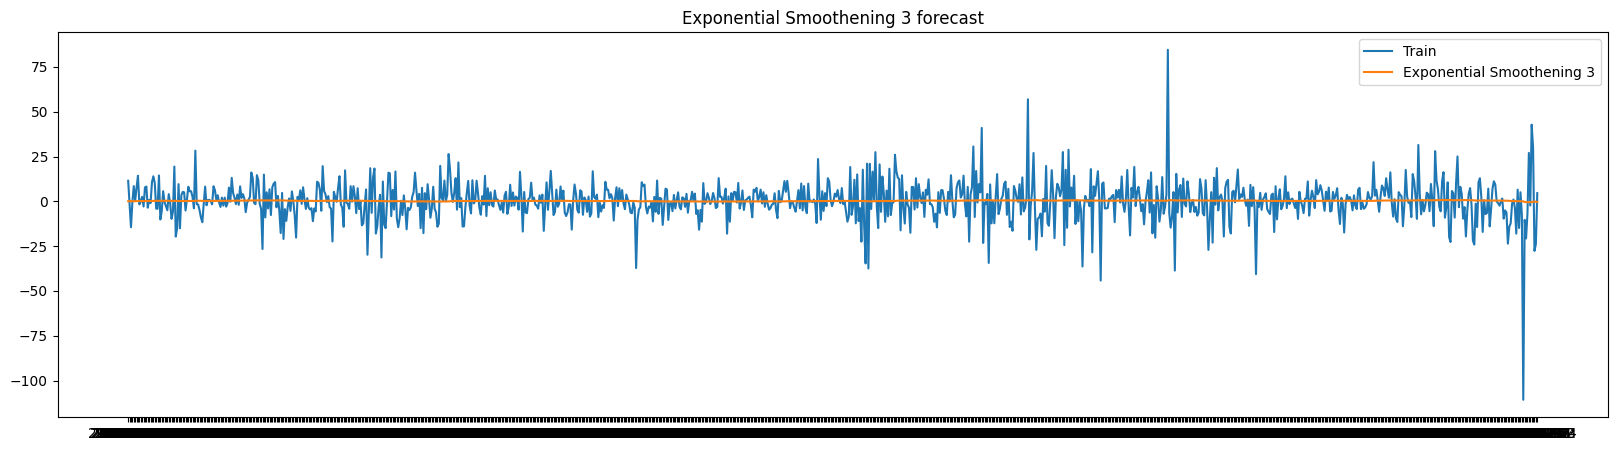

,Method,RMSE
0,Exponential Smoothening 3,11.06


In [51]:
plotResults(data_diff.Close,fit3.fittedvalues, "Exponential Smoothening 3").show()
getMetrics(data_diff.Close,fit3.fittedvalues,"Exponential Smoothening 3")

In [52]:
# store and print results
final=getMetrics(data_diff.Close,fit3.fittedvalues,"Exponential Smoothening 3")
models.append("Single Exponential Smoothening")
results.append(final.RMSE.tolist()[0])
final

,Method,RMSE
0,Exponential Smoothening 3,11.06


In [53]:
# define double exp smoothening
doubleExp= ExponentialSmoothing(data_diff.Close, trend='add').fit()

C:\Users\sripa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


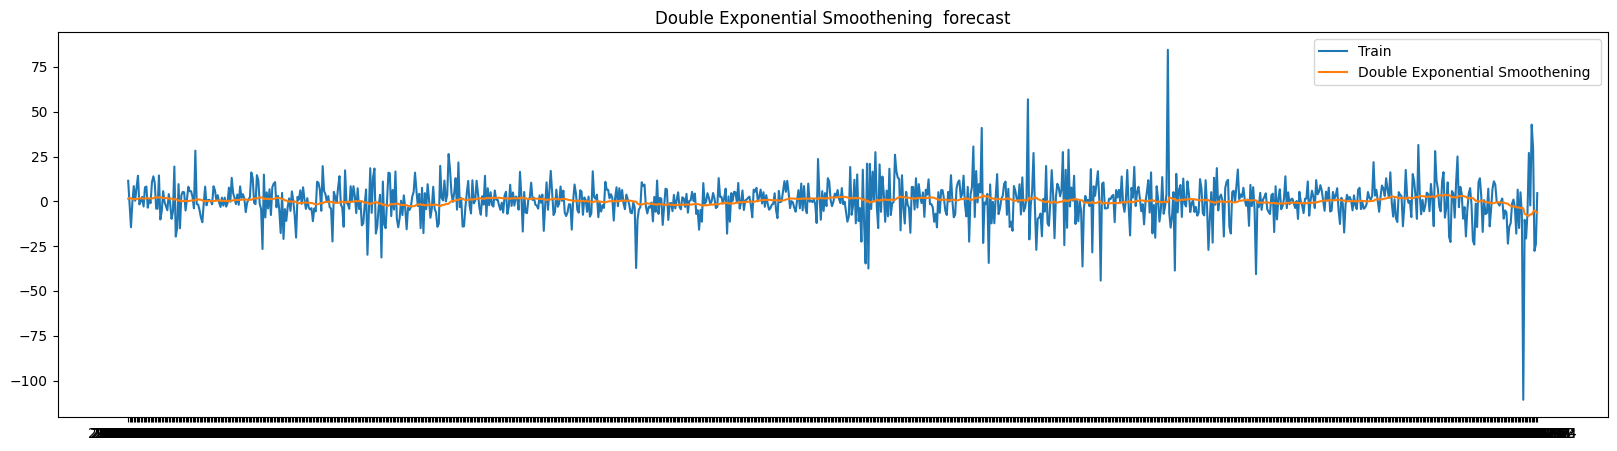

In [54]:
plotResults(data_diff.Close,doubleExp.fittedvalues, "Double Exponential Smoothening ").show()
final=getMetrics(data_diff.Close,doubleExp.fittedvalues, "Double Exponential Smoothening ")

In [55]:
models.append("Double Exponential Smoothening")
results.append(final.RMSE.tolist()[0])
final

,Method,RMSE
0,Double Exponential Smoothening,11.17


In [56]:
# Define triple exponential smoothening
tripleExp= ExponentialSmoothing(data_diff.Close, trend='add', seasonal='add', seasonal_periods=10).fit()

C:\Users\sripa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


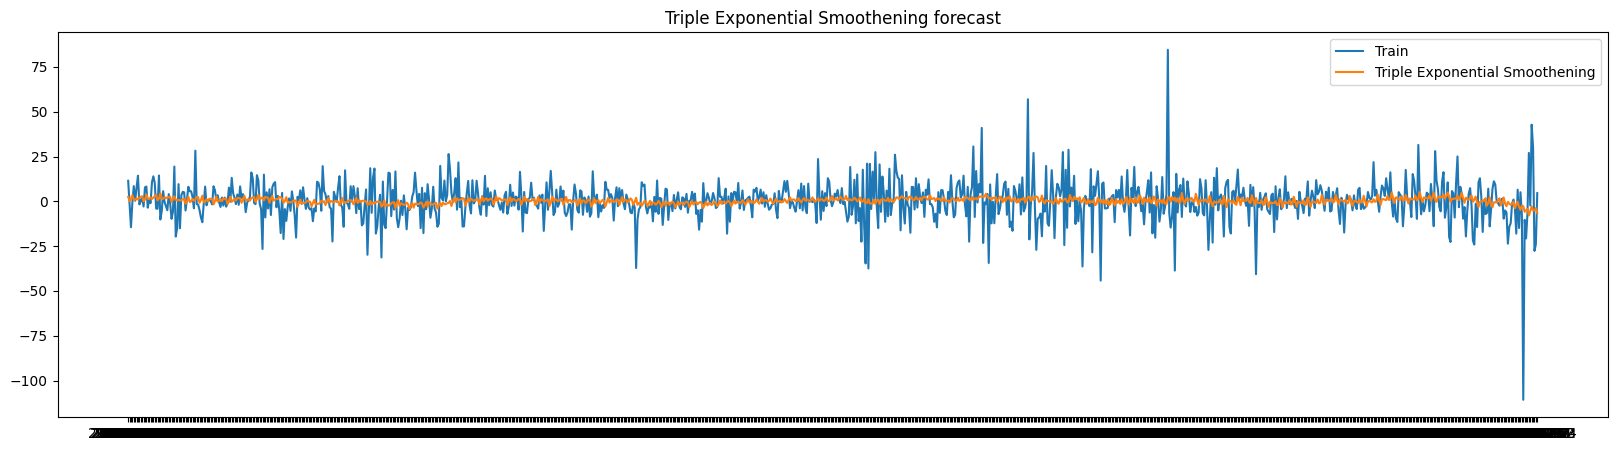

In [57]:
# plot and get metrics
plotResults(data_diff.Close,tripleExp.fittedvalues, "Triple Exponential Smoothening").show()
final=getMetrics(data_diff.Close,tripleExp.fittedvalues,  "Triple Exponential Smoothening")

In [58]:
# store and print results
models.append("Triple Exponential Smoothening")
results.append(final.RMSE.tolist()[0])
final

,Method,RMSE
0,Triple Exponential Smoothening,11.14


C:\Users\sripa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


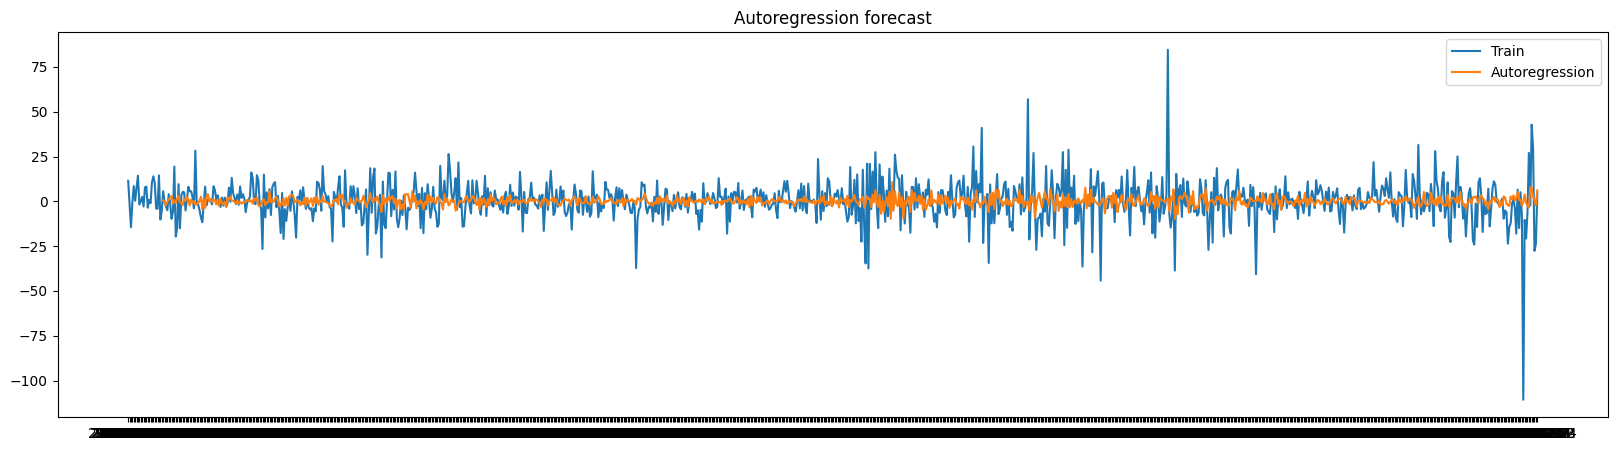

In [59]:
from statsmodels.tsa.ar_model import AutoReg
# fit model
arModel = AutoReg(data_diff.Close, lags=25)
res = arModel.fit()
# make prediction
plotResults(data_diff.Close,res.fittedvalues, "Autoregression").show()
final=getMetrics(data_diff.Close[0:-25],res.fittedvalues,"Autoregression")

In [60]:
# store and print results
models.append("Autoregression")
results.append(final.RMSE.tolist()[0])
final

,Method,RMSE
0,Autoregression,10.18


C:\Users\sripa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sripa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sripa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


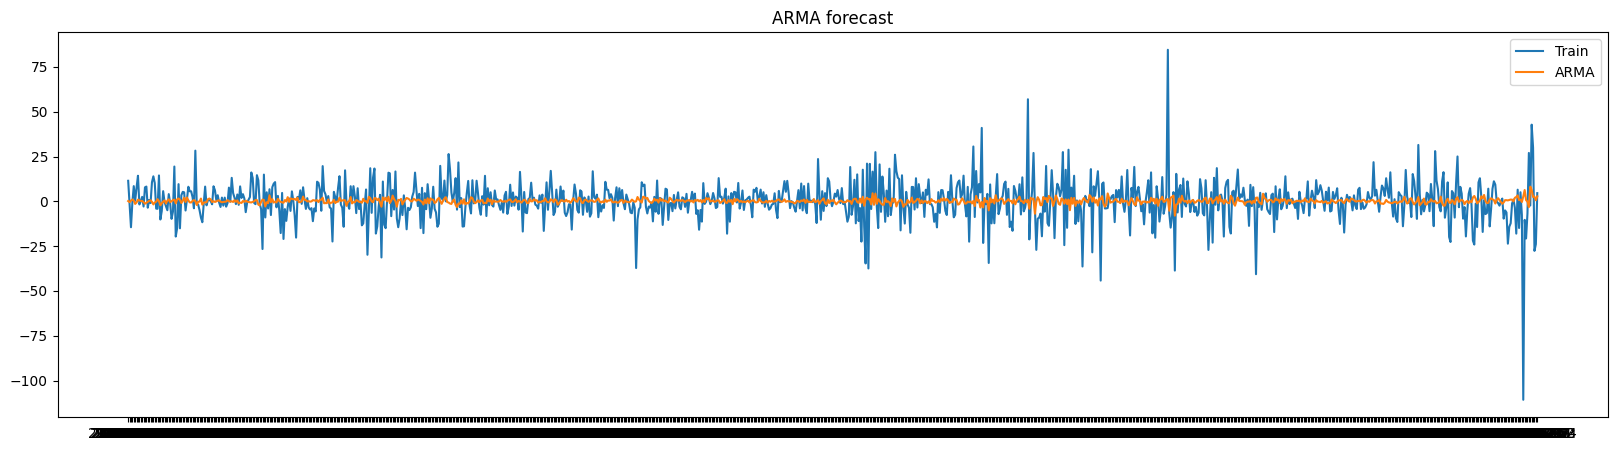

In [61]:
# fit model
model = ARIMA(data_diff.Close, order=(1, 0, 5))
armaModel = model.fit()

# make prediction, plot and get metrics
plotResults(data_diff.Close,armaModel.fittedvalues, "ARMA").show()
final=getMetrics(data_diff.Close,armaModel.fittedvalues, "ARMA")

In [62]:
# store and print results
models.append("ARMA")
results.append(final.RMSE.tolist()[0])
final

,Method,RMSE
0,ARMA,10.97


In [63]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
#     Check if the series is a pandas series or not because our plots assume them to be time series
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
#         use smt's plotting powers to plot PCF and ACF
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

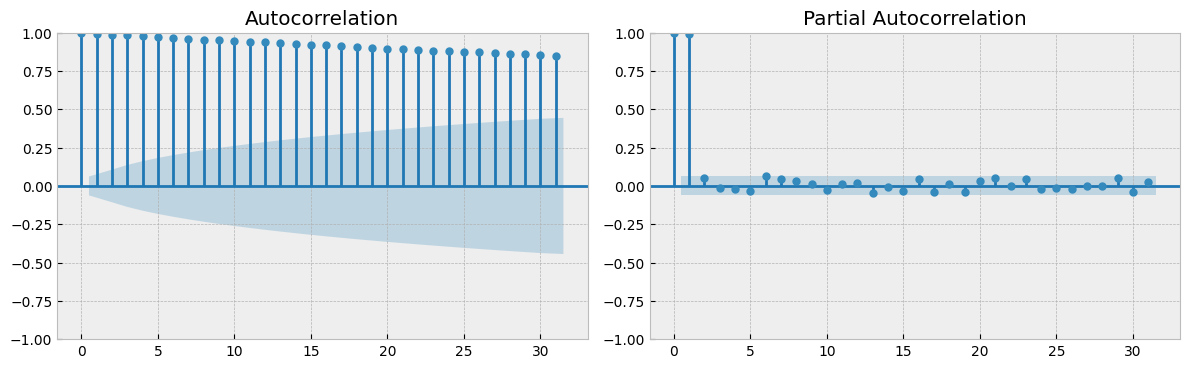

In [64]:
tsplot(data['Close'])

C:\Users\sripa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sripa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sripa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


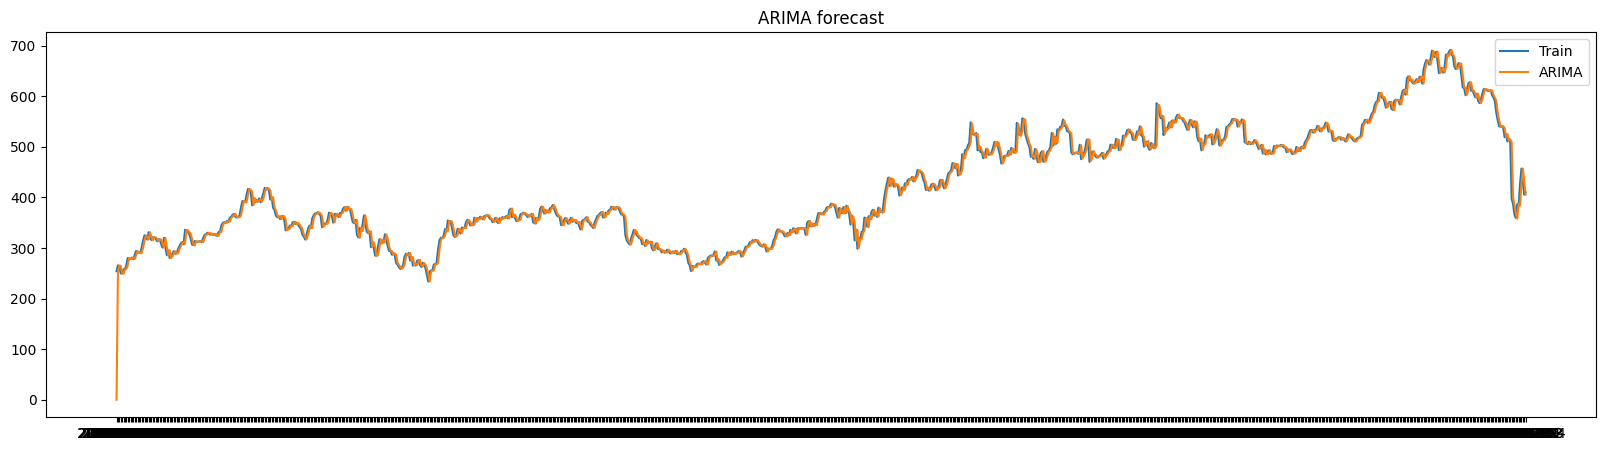

,Method,RMSE
0,ARIMA,13.62


In [65]:
# fit model
# order parameter is where we define p, d and q values.
model = ARIMA(data.Close, order=(1, 1, 1))
arimaModel = model.fit()


# make prediction and plots
plotResults(data.Close,arimaModel.fittedvalues, "ARIMA").show()
final=getMetrics(data.Close,arimaModel.fittedvalues,  "ARIMA")
# store and print results


models.append("ARIMA")

results.append(final.RMSE.tolist()[0])
final

In [66]:
# import SARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data.Close, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
sariMa = model.fit(disp=False)
# make prediction
plotResults(data.Close,sariMax.fittedvalues, "SARIMA").show()
final=getMetrics(data.Close,sariMax.fittedvalues, "SARIMA")
# store and print results
models.append("SARIMA")
results.append(final.RMSE.tolist()[0])
final

C:\Users\sripa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sripa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


NameError: name 'sariMax' is not defined

In [67]:
newData = df[['Date', 'Close', 'Open']]
#  setting date as index
newData = newData.set_index('Date')

C:\Users\sripa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sripa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


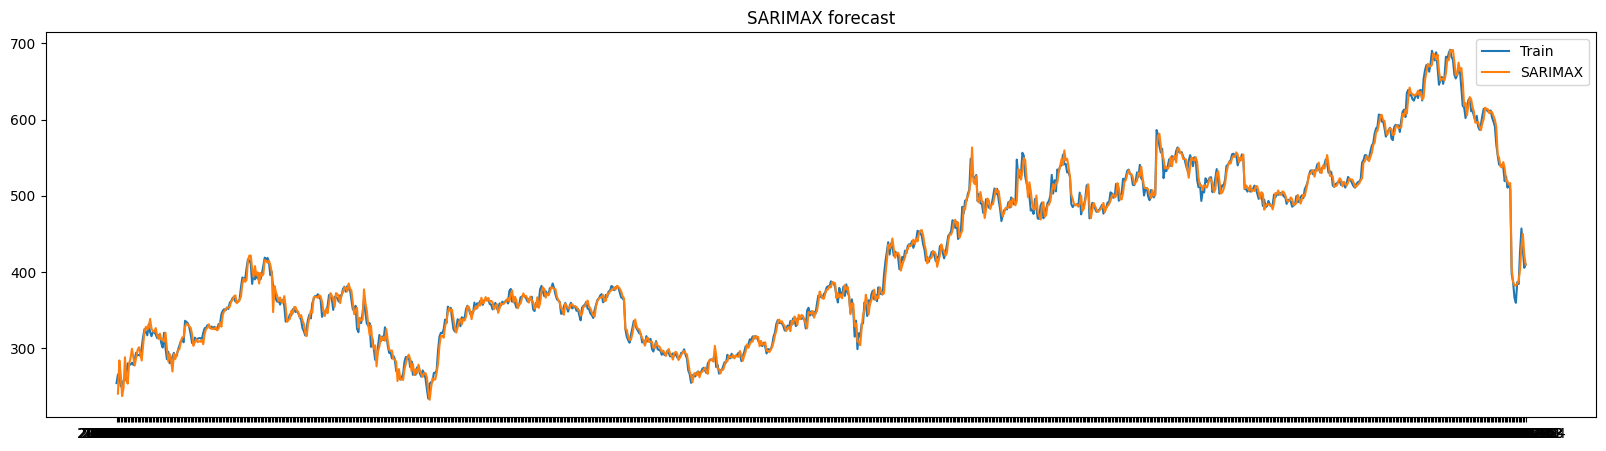

,Method,RMSE
0,SARIMAX,8.86


In [68]:
model=sm.tsa.statespace.SARIMAX(newData.Close, order=(1, 1, 1),seasonal_order=(1,1,1,5), exog=newData.Open)
sariMax=model.fit(disp=False)

# make prediction
plotResults(data.Close,sariMax.fittedvalues[1:], "SARIMAX").show()
final=getMetrics(data.Close[1:],sariMax.fittedvalues[1:], "SARIMAX")

# store and print results
models.append("SARIMAX")
results.append(final.RMSE.tolist()[0])
final

In [69]:
df = pd.DataFrame(list(zip(models, results)),
               columns =['Model', 'RMSE of the model'])
df

,Model,RMSE of the model
0,Naive Model,11.05
1,Moving Average,11.05
2,Single Exponential Smoothening,11.06
3,Double Exponential Smoothening,11.17
4,Triple Exponential Smoothening,11.14
5,Autoregression,10.18
6,ARMA,10.97
7,ARIMA,13.62
8,SARIMAX,8.86
